In [62]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
    
    
    
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [64]:
df=pd.read_csv("modified-Data_Cortex_Nuclear.csv")
df.head()
df.isna().sum().sum()

1396

In [65]:
#X, y
y=df['Treatment']
X= df.drop(columns='Treatment')
X_train,X_test, y_train, y_test= train_test_split(X,y, random_state=42)


In [66]:
y_train.value_counts(normalize="true")

Drug       0.54321
Placebo    0.45679
Name: Treatment, dtype: float64

In [67]:
num_cols= X_train.select_dtypes('number').columns
imputer=SimpleImputer(strategy="constant",fill_value=0)
scaler=StandardScaler()
pipe_num = make_pipeline(imputer,scaler)
num_top= ("number",pipe_num, num_cols)


In [68]:

col_transformer= ColumnTransformer([num_top],verbose_feature_names_out=False)
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('number',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N'...
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [69]:
X_train_tf=col_transformer.transform(X_train)
X_test_tf=col_transformer.transform(X_test)
X_test_tf

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
423,0.237209,0.146442,0.420727,0.436922,0.827730,0.952072,1.328669,0.491639,1.443411,0.221663,0.518139,0.795414,0.364967,1.198264,0.298925,0.449763,0.589050,-0.024675,0.743084,0.574506,0.507590,1.922213,1.548322,-0.169440,0.582443,-0.223119,1.692720,1.159162,0.606417,2.723324,0.068109,0.321441,-0.627930,-0.465023,-0.904604,0.107721,0.505239,1.068624,0.118728,2.139086,0.695064,0.635994,-0.909188,0.468201,-0.694964,0.977657,-1.332629,0.328296,1.398803,-0.777774,-0.580819,0.543718,0.240572,-0.919169,-1.246605,-1.455639,-0.839742,0.583760,-0.854326,-0.744888,-2.078339,-2.084024,-1.579205,-0.761426,-0.630672,-0.715062,-2.580860,-1.720917,-1.909506,-1.560262,-0.919169,-0.290138,-2.315028,-1.722601,-1.888021,-1.543589,0.369270
548,-0.959794,-1.246275,-1.682969,-1.528487,-1.158150,-1.319583,-1.481791,-0.600035,-0.717540,-1.328142,-0.964426,-1.174860,-1.765433,-1.552273,-1.127364,-0.600552,-1.259467,-1.525247,-0.824779,-0.513063,-0.879157,-1.390880,-1.021429,-0.331844,-1.394636,-2.035139,-1.824993,-1.895733,-1.875722,-1.502017,-2.129380,-0.983053,0.100593,-1.198229,-0.352500,-1.140188,-1.395463,-1.591388,-0.830279,-1.807908,-1.449709,-1.404927,-0.573758,-0.341943,0.131782,-0.431535,-0.895380,-1.088730,0.351906,-0.765949,4.892534,0.532273,-0.608529,0.439191,1.308627,-0.488044,3.474692,1.002953,0.872771,0.081879,1.882650,-1.021780,-0.348972,0.549505,0.549720,-0.583161,-1.471640,-0.003624,0.466227,0.719433,0.439191,0.186612,-0.711472,-1.722601,0.896773,1.827619,-0.773747
731,-0.550606,-0.407075,-0.596820,-0.660626,-0.522246,-0.307310,0.634441,-0.462211,0.421649,-0.367760,-0.691882,0.109635,-0.328182,0.667800,-0.699018,0.352428,-0.555651,-0.909031,-0.178125,0.152729,-0.734249,-0.063386,0.283680,-0.373757,-0.434756,-0.769730,-0.375846,0.055822,-0.602096,-0.052187,0.276752,-0.112454,2.165382,0.153390,0.525727,0.269394,0.410018,-0.270797,-0.398087,-0.159077,0.804071,0.832524,-0.405285,-0.828422,-0.402095,0.515712,-0.680942,0.279392,-0.887128,0.339232,-0.407060,0.928196,0.063360,0.004493,0.407755,-0.221935,-0.985838,1.083778,1.424457,1.385449,1.319845,-0.527434,1.697992,0.554741,0.927537,0.806344,-0.053214,-0.117574,0.961510,-1.560262,0.004493,0.761031,0.942054,-1.722601,1.741399,-1.543589,-0.578303
588,0.542739,0.493695,-0.113850,0.446124,0.012104,-0.736759,-0.561620,-0.845789,-0.553481,-0.033146,0.403298,-1.306994,0.155242,-0.735923,-0.150986,-1.462036,-0.288097,0.374208,0.299102,-0.500219,0.445774,-0.908245,-0.386684,0.138670,0.114139,0.946198,0.048519,0.002442,0.258157,-0.401885,0.788262,0.309821,-0.814644,-1.048297,-1.152140,-1.073839,-0.583410,-0.508353,-0.310335,-1.097842,-1.094795,-0.621676,-0.298880,0.419875,-0.454787,0.071411,-0.035122,0.067986,0.717171,-0.873945,0.050295,-0.540028,0.297409,-0.685047,-0.403094,0.512506,-0.336008,-0.392296,0.339451,0.019204,-0.145971,-0.070978,-0.599974,1.182053,-1.383059,-1.260405,0.407136,-0.441104,-1.909506,0.153811,-0.685047,-0.463034,-0.937933,0.104204,-1.888021,-1.543589,1.215707
1051,-0.555478,-0.375994,0.045078,0.378800,-0.234740,0.278018,0.283408,0.205594,1.133214,-0.731571,-0.740305,0.008918,-0.258819,0.521339,0.421182,-0.278708,-0.633590,0.068706,0.512128,-0.000914,-0.593862,-0.121518,0.094141,0.202927,0.101204,0.135511,0.221787,0.284962,0.867124,0.687285,0.842151,0.859054,1.457370,-0.067370,-0.614783,-0.177694,-0.082688,-0.367866,0.107208,-0.440161,-0.637911,-0.194886,1.815034,0.500127,-0.940481,-0.906902,1.3798

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       440
     Placebo       1.00      1.00      1.00       370

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



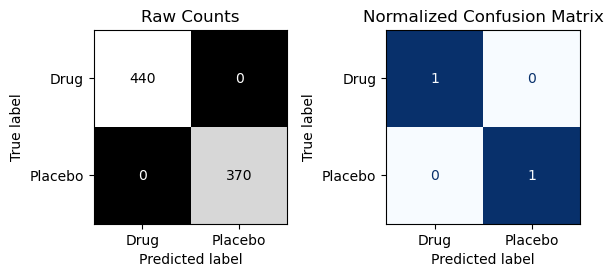


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       130
     Placebo       1.00      1.00      1.00       140

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



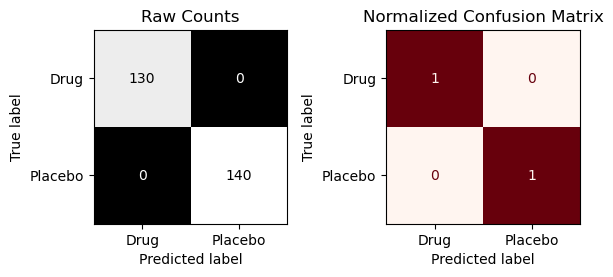

In [70]:
# Use all features for a default random forest
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_train_tf, y_train)
evaluate_classification(rf_clf, X_train_tf, y_train, X_test_tf, y_test)


In [71]:
# Instantiate the model
tree=DecisionTreeClassifier(random_state=42)


In [72]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs=SequentialFeatureSelector(tree,n_features_to_select=39,direction="forward",n_jobs=-1,cv=5)

In [73]:
sfs.fit(X_train_tf,y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=39, n_jobs=-1)

In [74]:
# Preview array
sfs.support_[0:5]

array([False,  True, False,  True, False])

In [75]:
# .support_ returns an array of T/F whether it is above threshold
feature_selctin_39=sfs.support_
# Only include the features selected
X_train_39 = X_train_tf.loc[:,feature_selctin_39]
X_test_39 = X_test_tf.loc[:,feature_selctin_39]


In [76]:
# Use all features for a default random forest
rf_clf1 = RandomForestClassifier(random_state = 42)
rf_clf1.fit(X_train_39, y_train)
#evaluate_classification(rf_clf1, X_train_39, y_train, X_test_39, y_test)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       440
     Placebo       1.00      1.00      1.00       370

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



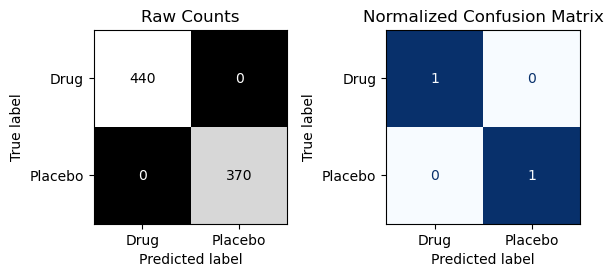


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       0.98      0.99      0.98       130
     Placebo       0.99      0.98      0.99       140

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



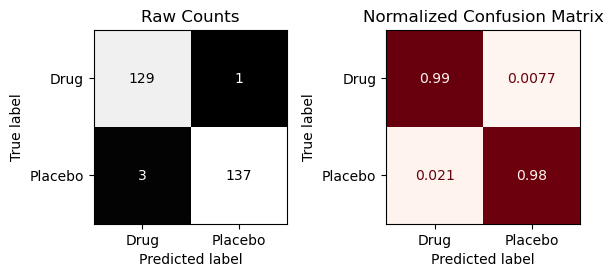

In [77]:
evaluate_classification(rf_clf1, X_train_39, y_train, X_test_39, y_test)

In [78]:

#n_features_to_select=19
sfs=SequentialFeatureSelector(tree,n_features_to_select=19,direction="forward",n_jobs=-1,cv=2)
sfs.fit(X_train_tf,y_train)

SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=19, n_jobs=-1)

In [79]:
# Preview array
sfs.support_[0:5]

array([False, False, False, False,  True])

In [80]:
feature_selctin_19=sfs.support_
# Only include the features selected
X_train_19 = X_train_tf.loc[:,feature_selctin_19]
X_test_19 = X_test_tf.loc[:,feature_selctin_19]

In [81]:
# Use all features for a default random forest
rf_clf1 = RandomForestClassifier(random_state = 42)
rf_clf1.fit(X_train_19, y_train)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       440
     Placebo       1.00      1.00      1.00       370

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



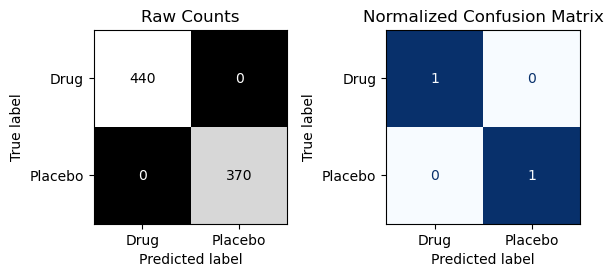


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       0.97      0.98      0.97       130
     Placebo       0.98      0.97      0.97       140

    accuracy                           0.97       270
   macro avg       0.97      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270



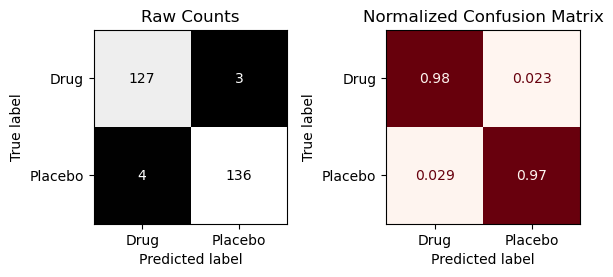

In [82]:
evaluate_classification(rf_clf1, X_train_19, y_train, X_test_19, y_test)

* As we decreased the number of features, we saw the accuracy decline slightly, but the advantage is that less features will make the model easi